In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas, Matplotlib and Seaborn Assignment

## 1. Find the total revenue generated by all the movies released only on Saturday's & Sunday's.

In [110]:
movies = pd.read_csv("movies.csv")

In [111]:
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [112]:
movies.loc[(movies['day'] == 'Saturday') | (movies['day'] == 'Sunday')]

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
12,17,43614,380000000,135,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,4775,2011,May,Saturday
40,59,43656,200000000,45,769653595,2012,5.6,4903,4803,2009,Oct,Saturday
51,73,43670,175000000,27,173000000,Evan Almighty,5.3,1151,4812,2007,Jun,Saturday
69,112,43709,155000000,39,167298192,Alexander,5.6,927,4839,2004,Nov,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
1442,4566,48185,860000,3,2451545,My Beautiful Laundrette,6.6,51,5249,1985,Sep,Saturday
1444,4584,48204,312000,1,1281176,Tumbleweeds,6.2,11,5489,1999,Nov,Sunday
1447,4610,48231,0,3,0,Better Luck Tomorrow,6.5,27,4802,2002,Jan,Saturday
1456,4694,48321,10000,20,7000000,Eraserhead,7.5,485,5265,1977,Mar,Saturday


## 2.Find out the list of all the Movies which has that word "The" in it

In [113]:
movies.loc[movies['title'].str.contains('The')]

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
9,13,43610,255000000,49,89289910,The Lone Ranger,5.9,2311,4763,2013,Jul,Wednesday
11,15,43612,225000000,53,419651413,The Chronicles of Narnia: Prince Caspian,6.3,1630,4774,2008,May,Thursday
14,19,43616,250000000,120,956019788,The Hobbit: The Battle of the Five Armies,7.1,4760,4777,2014,Dec,Wednesday
16,22,43619,250000000,94,958400000,The Hobbit: The Desolation of Smaug,7.6,4524,4777,2013,Dec,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,4540,48155,0,0,0,Alleluia! The Devil's Carnival,6.0,2,6056,2016,Mar,Tuesday
1443,4572,48192,350000,35,29400000,The Evil Dead,7.3,894,4767,1981,Oct,Thursday
1449,4621,48244,250000,6,56825,The Canyons,4.1,75,5970,2013,Jul,Monday
1457,4696,48323,0,5,0,The Mighty,7.1,51,4921,1998,Oct,Friday


## 3. Get a list of all the movies with their Vote average Max and Min with Multi indexed columns and then get their final out put as single indexed columns. (Vote_average_Max and Vote_Average_Min)


In [114]:
vote_avg = movies.groupby('title')['vote_average'].aggregate(['min','max'])

In [115]:
vote_avg.columns

Index(['min', 'max'], dtype='object')

In [116]:
vote_avg.columns = ['Vote_average_'+tuple for tuple in vote_avg.columns]

In [117]:
vote_avg

,Vote_average_min,Vote_average_max
title,,
12 Rounds,5.7,5.7
127 Hours,7.0,7.0
13 Going on 30,6.3,6.3
13 Hours: The Secret Soldiers of Benghazi,7.0,7.0
16 Blocks,6.2,6.2
...,...,...
Zoolander,6.1,6.1
Zoolander 2,4.7,4.7
eXistenZ,6.7,6.7


## 4. In the Pfizer data set find out which hour(s) in the day has temperature going above 35°c.

In [118]:
data = pd.read_csv("Pfizer_1.csv")

In [119]:
data_m = pd.melt(data,id_vars=['Date','Drug_Name','Parameter'],var_name='Time',value_name='Reading')

In [120]:
data_m

,Date,Drug_Name,Parameter,Time,Reading
0,15-10-2020,diltiazem hydrochloride,Temperature,1:30:00,23.0
1,15-10-2020,diltiazem hydrochloride,Pressure,1:30:00,12.0
2,15-10-2020,docetaxel injection,Temperature,1:30:00,NaN
3,15-10-2020,docetaxel injection,Pressure,1:30:00,NaN
4,15-10-2020,ketamine hydrochloride,Temperature,1:30:00,24.0
...,...,...,...,...,...
211,17-10-2020,diltiazem hydrochloride,Pressure,12:30:00,14.0
212,17-10-2020,docetaxel injection,Temperature,12:30:00,23.0
213,17-10-2020,docetaxel injection,Pressure,12:30:00,28.0
214,17-10-2020,ketamine hydrochloride,Temperature,12:30:00,24.0


In [121]:
data_p = data_m.pivot(index=['Date','Drug_Name','Time'],columns='Parameter',values='Reading').reset_index()

In [122]:
data_p.loc[data_p['Temperature'] > 35].groupby('Date')[['Date','Drug_Name','Time','Temperature']].apply(lambda x: x.reset_index(drop=True))

Parameter            Date                Drug_Name      Time  Temperature
Date                                                                     
16-10-2020 0   16-10-2020  diltiazem hydrochloride  10:30:00         40.0
           1   16-10-2020  diltiazem hydrochloride  12:30:00         42.0
           2   16-10-2020  diltiazem hydrochloride   3:30:00         36.0
           3   16-10-2020  diltiazem hydrochloride   4:30:00         36.0
           4   16-10-2020  diltiazem hydrochloride   5:30:00         37.0
           5   16-10-2020  diltiazem hydrochloride   6:30:00         38.0
           6   16-10-2020  diltiazem hydrochloride   7:30:00         37.0
           7   16-10-2020  diltiazem hydrochloride   8:30:00         38.0
           8   16-10-2020  diltiazem hydrochloride   9:30:00         39.0
           9   16-10-2020      docetaxel injection  10:30:00         56.0
           10  16-10-2020      docetaxel injection  11:30:00         57.0
           11  16-10-2020      docetaxel injection  12:30:00         58.0
           12  16-10-2020      docetaxel injection   1:30:00         46.0
           13  16-10-2020      docetaxel injection   2:30:00         47.0
           14  16-10-2020      docetaxel injection   4:30:00         48.0
           15  16-10-2020      docetaxel injection   5:30:00         48.0
           16  16-10-2020      docetaxel injection   6:30:00         49.0
           17  16-10-2020      docetaxel injection   7:30:00         50.0
           18  16-10-2020      docetaxel injection   8:30:00         52.0
           19  16-10-2020      docetaxel injection   9:30:00         55.0

## 5. In the Pfizer data set create 3 columns that should display the year in the below formats.(DD-MM-YYYY), (MM-DD-YYYY), (YYYY-MM-DD).


In [123]:
data_p['Time stamp'] = data_p['Date'] + " " + data_p['Time']

In [124]:
data_p['Time stamp'] = pd.to_datetime(data_p['Time stamp'])

C:\Users\saite\AppData\Local\Temp\ipykernel_36568\2302384324.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_p['Time stamp'] = pd.to_datetime(data_p['Time stamp'])


In [125]:
data_p['Format1'] = data_p['Time stamp'].dt.strftime('%d-%m-%Y')
data_p['Format2'] = data_p['Time stamp'].dt.strftime('%m-%d-%Y')
data_p['Format3'] = data_p['Time stamp'].dt.strftime('%Y-%m-%d')

In [126]:
data_p

Parameter,Date,Drug_Name,Time,Pressure,Temperature,Time stamp,Format1,Format2,Format3
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0,2020-10-15 10:30:00,15-10-2020,10-15-2020,2020-10-15
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0,2020-10-15 11:30:00,15-10-2020,10-15-2020,2020-10-15
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0,2020-10-15 12:30:00,15-10-2020,10-15-2020,2020-10-15
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0,2020-10-15 01:30:00,15-10-2020,10-15-2020,2020-10-15
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0,2020-10-15 02:30:00,15-10-2020,10-15-2020,2020-10-15
...,...,...,...,...,...,...,...,...,...
103,17-10-2020,ketamine hydrochloride,5:30:00,11.0,17.0,2020-10-17 05:30:00,17-10-2020,10-17-2020,2020-10-17
104,17-10-2020,ketamine hydrochloride,6:30:00,12.0,18.0,2020-10-17 06:30:00,17-10-2020,10-17-2020,2020-10-17
105,17-10-2020,ketamine hydrochloride,7:30:00,12.0,19.0,2020-10-17 07:30:00,17-10-2020,10-17-2020,2020-10-17
106,17-10-2020,ketamine hydrochloride,8:30:00,11.0,20.0,2020-10-17 08:30:00,17-10-2020,10-17-2020,2020-10-17


## 6. Find out what is the highest number of null values present for 'Ketamine Hydrochloride' drug.

In [127]:
data_kh = data_p.loc[data_p['Drug_Name'].str.contains('Ketamine hydrochloride',case=False)]
data_kh.isnull().sum()

Parameter
Date           0
Drug_Name      0
Time           0
Pressure       5
Temperature    5
Time stamp     0
Format1        0
Format2        0
Format3        0
dtype: int64

## 7. In the Pfizer dataset, create different bins for the time categorising them as (Morning, Afternoon, Evening, Night) Bin the time accordingly and display the total values present for each bins.

In [128]:
data_p['Hour'] = pd.to_datetime(data_p['Time']).dt.hour

C:\Users\saite\AppData\Local\Temp\ipykernel_36568\2566498954.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_p['Hour'] = pd.to_datetime(data_p['Time']).dt.hour


In [130]:
bin_values = [0, 5, 11, 16, 19, 24]  # Bins for 24-hour time representation
bin_labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']
data_p['Time_category'] = pd.cut(data_p['Hour'], bins=bin_values, labels=bin_labels, include_lowest=True,ordered=False)

In [131]:
data_p

Parameter,Date,Drug_Name,Time,Pressure,Temperature,Time stamp,Format1,Format2,Format3,Hour,Time_category
0,15-10-2020,diltiazem hydrochloride,10:30:00,18.0,20.0,2020-10-15 10:30:00,15-10-2020,10-15-2020,2020-10-15,10,Morning
1,15-10-2020,diltiazem hydrochloride,11:30:00,19.0,20.0,2020-10-15 11:30:00,15-10-2020,10-15-2020,2020-10-15,11,Morning
2,15-10-2020,diltiazem hydrochloride,12:30:00,20.0,21.0,2020-10-15 12:30:00,15-10-2020,10-15-2020,2020-10-15,12,Afternoon
3,15-10-2020,diltiazem hydrochloride,1:30:00,12.0,23.0,2020-10-15 01:30:00,15-10-2020,10-15-2020,2020-10-15,1,Night
4,15-10-2020,diltiazem hydrochloride,2:30:00,13.0,22.0,2020-10-15 02:30:00,15-10-2020,10-15-2020,2020-10-15,2,Night
...,...,...,...,...,...,...,...,...,...,...,...
103,17-10-2020,ketamine hydrochloride,5:30:00,11.0,17.0,2020-10-17 05:30:00,17-10-2020,10-17-2020,2020-10-17,5,Night
104,17-10-2020,ketamine hydrochloride,6:30:00,12.0,18.0,2020-10-17 06:30:00,17-10-2020,10-17-2020,2020-10-17,6,Morning
105,17-10-2020,ketamine hydrochloride,7:30:00,12.0,19.0,2020-10-17 07:30:00,17-10-2020,10-17-2020,2020-10-17,7,Morning
106,17-10-2020,ketamine hydrochloride,8:30:00,11.0,20.0,2020-10-17 08:30:00,17-10-2020,10-17-2020,2020-10-17,8,Morning


## 8. In the Games dataset Perform a univariate analysis on the Platform column and display bar chart for the same.

In [132]:
games = pd.read_csv("final_vg.csv")

In [133]:
games

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
...,...,...,...,...,...,...,...,...,...,...,...,...
16647,16647,7925,Zumba Fitness Rush,X360,2012.0,Sports,505 Games,4.409308,3.167419,4.168474,1.087977,13.053204
16648,16648,6279,Zumba Fitness: World Party,Wii,2013.0,Misc,Majesco Entertainment,3.033887,2.792725,1.596852,1.493442,8.878837
16649,16649,6977,Zumba Fitness: World Party,XOne,2013.0,Misc,Majesco Entertainment,3.228043,2.004268,1.833151,1.087977,7.954274
16650,16650,15422,Zwei!!,PSP,2008.0,Role-Playing,Falcom Corporation,1.087977,0.592445,1.087977,0.394830,3.509168


## Univariate Analysis - Platform

In [135]:
plat_count = games.Platform.value_counts()
plat_count

Platform
DS      2163
PS2     2161
PS3     1330
Wii     1327
X360    1267
PSP     1213
PS      1204
PC       969
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      338
N64      319
SNES     251
XOne     213
SAT      173
2600     144
WiiU     143
GB       102
NES       99
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
X361       1
X362       1
PCFX       1
GG         1
Name: count, dtype: int64

<BarContainer object of 33 artists>

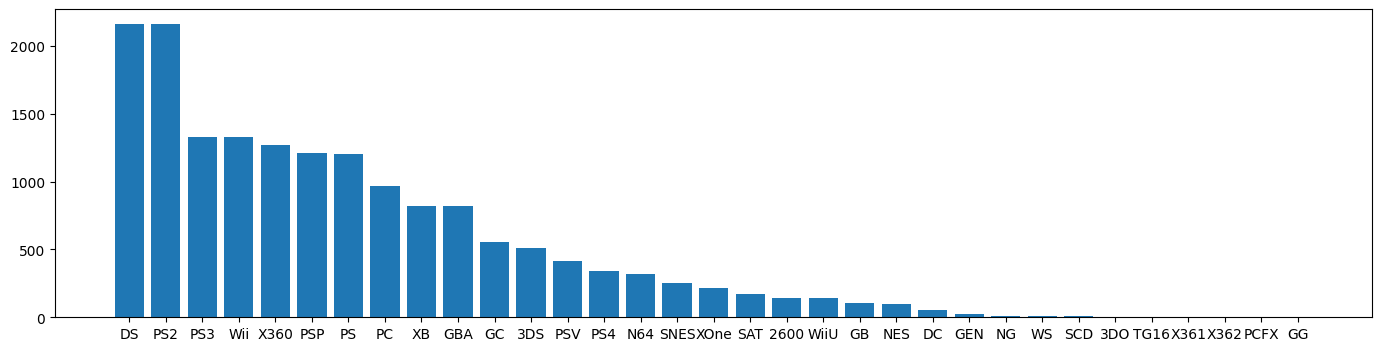

In [151]:
plt.figure(figsize=(17,4))
plt.bar(plat_count.index,plat_count)

<Axes: xlabel='Platform', ylabel='count'>

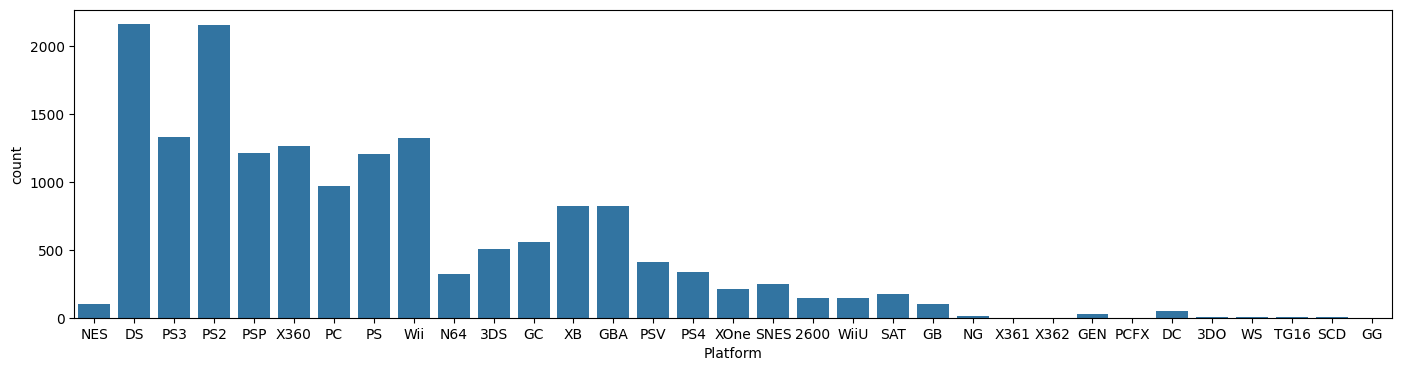

In [153]:
plt.figure(figsize=(17,4))
sns.countplot(x='Platform',data= games)